In [1]:
### 9.2.13 ### récap des différents mode d'affichage

from nilearn import datasets

# haxby dataset to have EPI images and masks
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First subject anatomical nifti image (3D) is at: %s' %
      haxby_dataset.anat[0])
print('First subject functional nifti image (4D) is at: %s' %
      haxby_dataset.func[0])  # 4D data

haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

First subject anatomical nifti image (3D) is at: /home/pierre/nilearn_data/haxby2001/subj2/anat.nii.gz
First subject functional nifti image (4D) is at: /home/pierre/nilearn_data/haxby2001/subj2/bold.nii.gz


/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


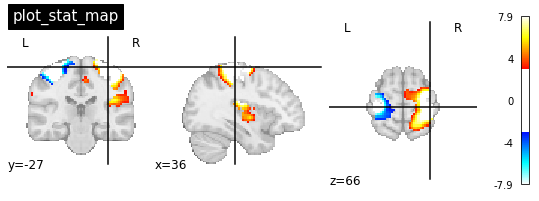

In [2]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(stat_img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])


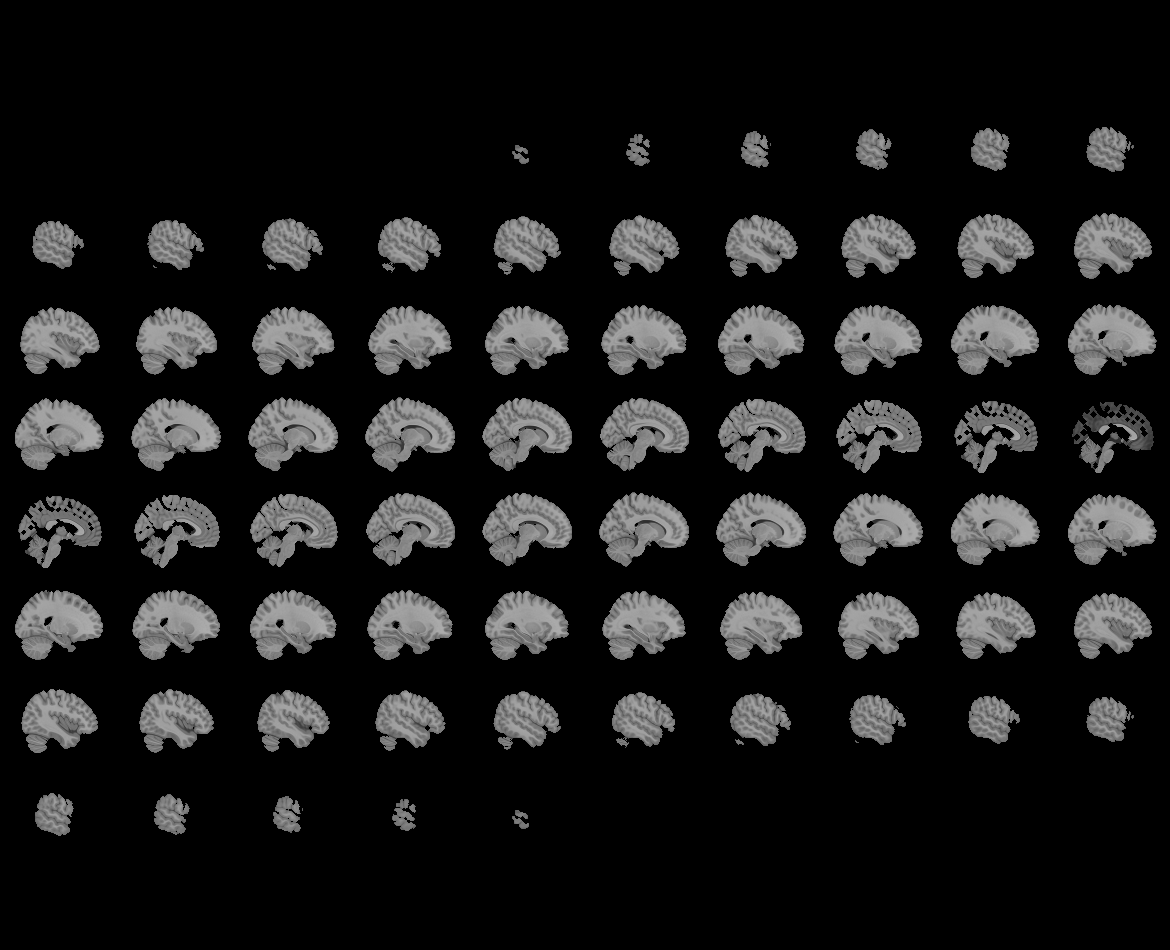
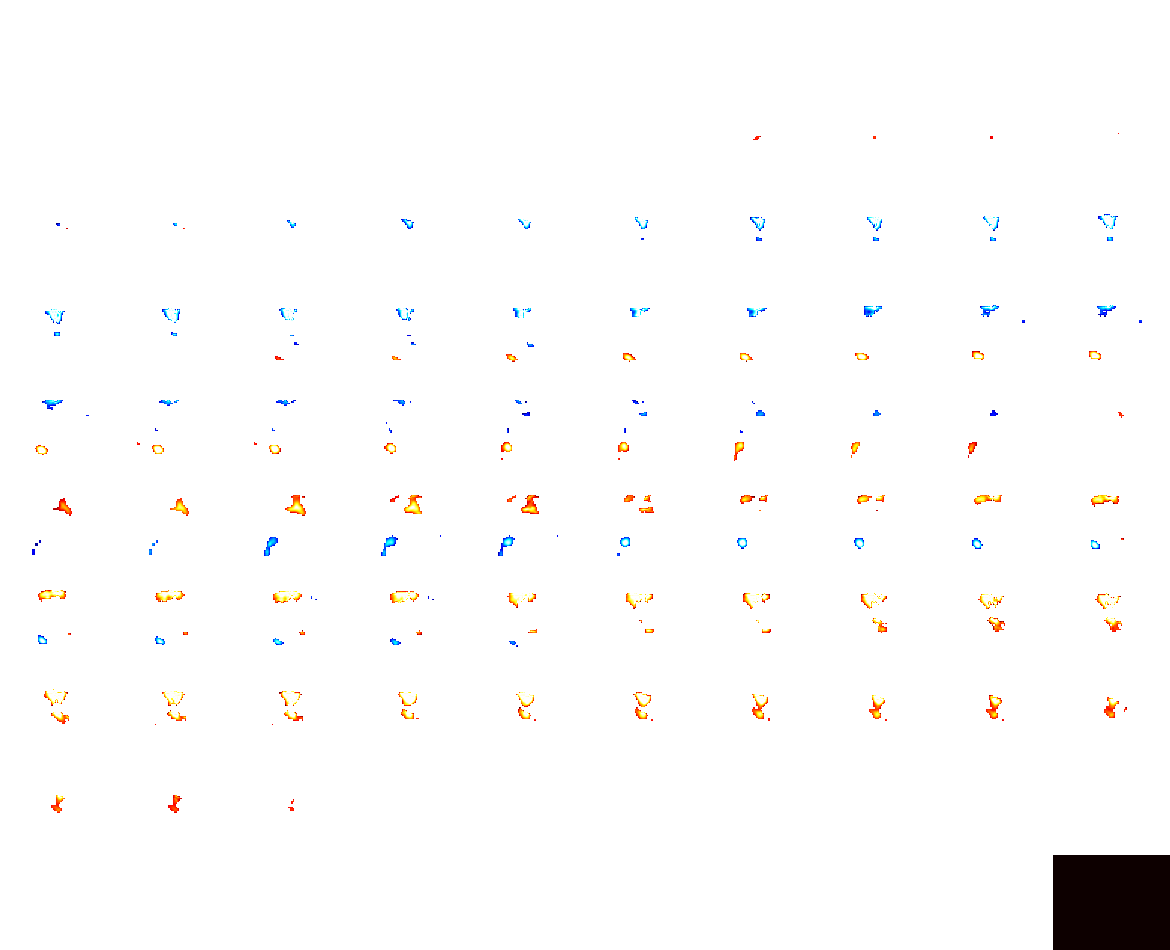

In [3]:
view = plotting.view_img(stat_img, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

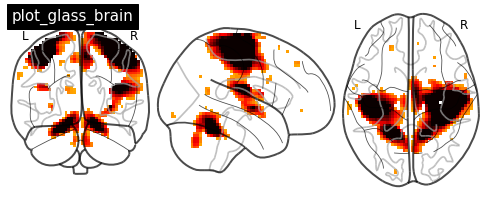

In [4]:
plotting.plot_glass_brain(stat_img, title='plot_glass_brain',
                          threshold=3)

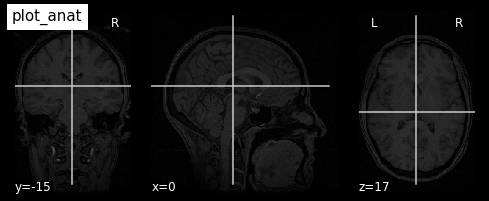

In [5]:
plotting.plot_anat(haxby_anat_filename, title="plot_anat")

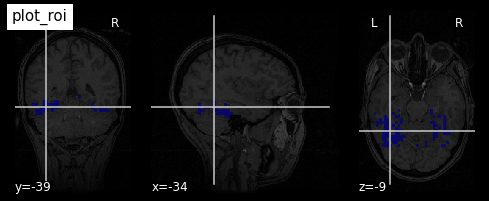

In [6]:
plotting.plot_roi(haxby_mask_filename, bg_img=haxby_anat_filename,
                  title="plot_roi")

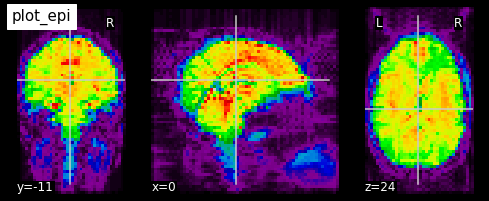

In [7]:
# Import image processing tool
from nilearn import image

# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D
mean_haxby_img = image.mean_img(haxby_func_filename)

# Visualizing mean image (3D)
plotting.plot_epi(mean_haxby_img, title="plot_epi")


Dataset created in /home/pierre/nilearn_data/allen_rsn_2011



Downloaded 22069248 of 32347736 bytes (68.2%,    0.5s remaining) ...done. (5 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/allen_rsn_2011/5f8f4a26df3a57a30ddc4285d4d5c6c2/download..... done.



Dataset created in /home/pierre/nilearn_data/pauli_2017



 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)



Dataset created in /home/pierre/nilearn_data/difumo_atlases



 ...done. (2 seconds, 0 min)
Extracting data from /home/pierre/nilearn_data/difumo_atlases/0fd53859aa9fed124e741c85ec45c705/download..... done.
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/datasets/atlas.py:130: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


 ...done. (1 seconds, 0 min)
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/pierre/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/pierre/anaconda3/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


ready


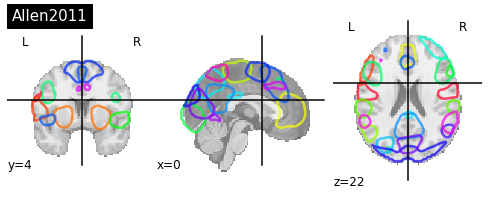

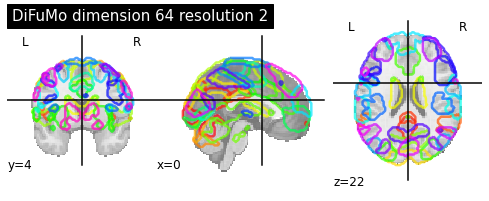

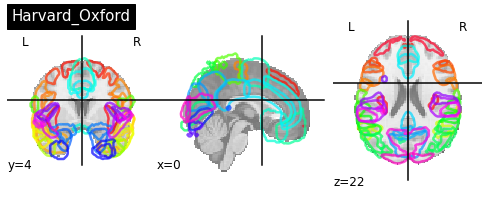

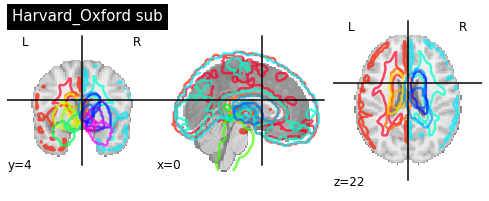

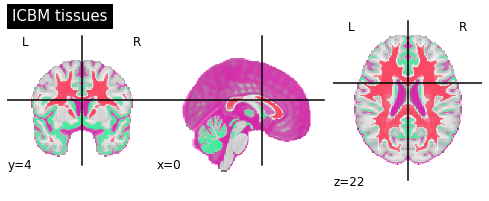

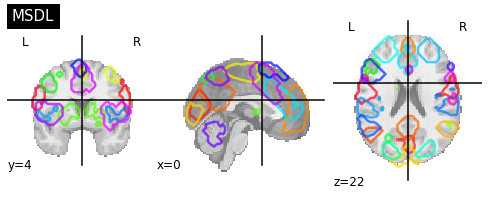

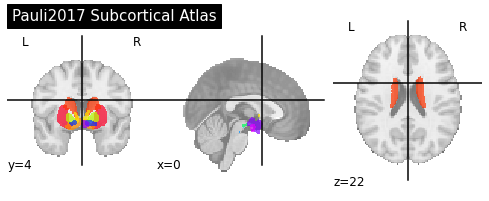

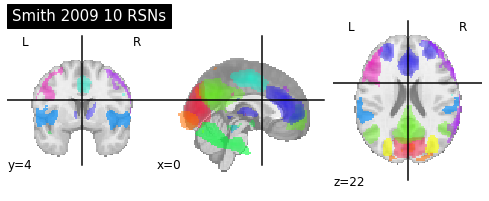

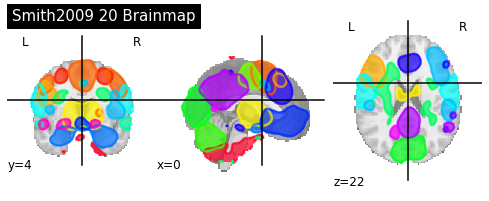

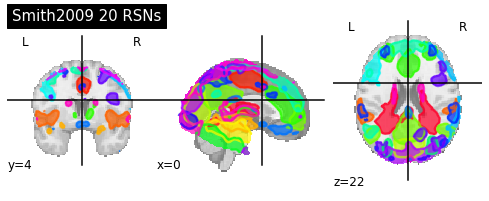

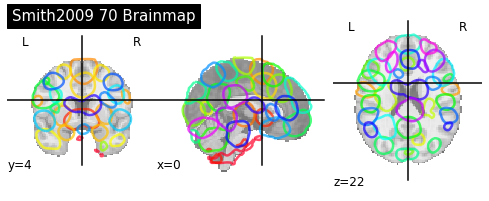

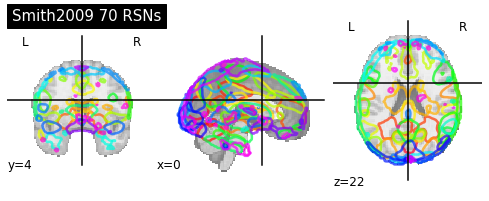

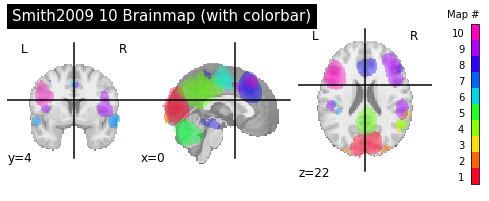

In [8]:
# Load 4D probabilistic atlases
from nilearn import datasets

# Harvard Oxford Atlasf
harvard_oxford = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
harvard_oxford_sub = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')

# Multi Subject Dictionary Learning Atlas
msdl = datasets.fetch_atlas_msdl()

# Smith ICA Atlas and Brain Maps 2009
smith = datasets.fetch_atlas_smith_2009()

# ICBM tissue probability
icbm = datasets.fetch_icbm152_2009()

# Allen RSN networks
allen = datasets.fetch_atlas_allen_2011()

# Pauli subcortical atlas
subcortex = datasets.fetch_atlas_pauli_2017()

# Dictionaries of Functional Modes (“DiFuMo”) atlas
dim = 64
res = 2
difumo = datasets.fetch_atlas_difumo(dimension=dim,
                                     resolution_mm=res)

# Visualization
from nilearn import plotting

atlas_types = {'Harvard_Oxford': harvard_oxford.maps,
               'Harvard_Oxford sub': harvard_oxford_sub.maps,
               'MSDL': msdl.maps, 'Smith 2009 10 RSNs': smith.rsn10,
               'Smith2009 20 RSNs': smith.rsn20,
               'Smith2009 70 RSNs': smith.rsn70,
               'Smith2009 20 Brainmap': smith.bm20,
               'Smith2009 70 Brainmap': smith.bm70,
               'ICBM tissues': (icbm['wm'], icbm['gm'], icbm['csf']),
               'Allen2011': allen.rsn28,
               'Pauli2017 Subcortical Atlas': subcortex.maps,
               'DiFuMo dimension {0} resolution {1}'.format(dim, res): difumo.maps,
               }

for name, atlas in sorted(atlas_types.items()):
    plotting.plot_prob_atlas(atlas, title=name)

# An optional colorbar can be set
plotting.plot_prob_atlas(smith.bm10, title='Smith2009 10 Brainmap (with'
                                           ' colorbar)',
                         colorbar=True)
print('ready')
plotting.show()